<a href="https://colab.research.google.com/github/auramolina/analitica3/blob/main/seguimiento_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='FFC300'> **Taller 3** </font>
##**Aura Molina**

Importar base de datos :

In [ ]:
import pandas as pd

#!gdown 1huegiNErbm6-JPOmI_vkX6p9xggfrG5O
# df = pd.read_csv("precios_pdtos_agricolas.cvs")
# df

In [ ]:
url = "https://raw.githubusercontent.com/ousuga/Proyecto1_IAN/main/precios_pdtos_agricolas.cvs"
df = pd.read_csv(url, sep=',', decimal=".")
df

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.1,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.1,01ago2023,4.499501,-75.724900
2,Arveja verde en vaina,bogotá,7925,0.11,01ago2023,NaN,NaN
3,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
...,...,...,...,...,...,...,...
9235,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031
9236,Yuca*,neiva,n.d.,n.d.,29ago2023,2.993360,-75.272362
9237,Yuca*,pereira,1400,0.01,29ago2023,4.803663,-75.795791
9238,Yuca*,santa,n.d.,n.d.,29ago2023,NaN,NaN


## <font color='FFC300'> Redefinir variables </font>

1. Justificación de la necesidad de redefinir variables y redefinición si es necesaria

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   producto      9240 non-null   object 
 1   ciudad        9240 non-null   object 
 2   precio        9240 non-null   object 
 3   variabilidad  9240 non-null   object 
 4   fecha         9240 non-null   object 
 5   LATITUD       7105 non-null   float64
 6   LONGITUD      7105 non-null   float64
dtypes: float64(2), object(5)
memory usage: 505.4+ KB


Para fines de formato, o estéticos, se cambian los header que están en mayúscula a minúscula

In [ ]:
nn = {'LATITUD': 'latitud',
      'LONGITUD': 'longitud'}
df.rename(columns = nn, inplace=True)

### <font color='FFC300'> Redefinición tipo de datos </font>

In [ ]:
df.dtypes

producto         object
ciudad           object
precio           object
variabilidad     object
fecha            object
latitud         float64
longitud        float64
dtype: object

Se cambia el tipo de variable de `fecha`de *object* a formato de fecha: *datatime*

In [ ]:
df['fecha'] = df['fecha'].str.replace('ago', 'Aug')
df['fecha'] = pd.to_datetime(df['fecha'], format='%d%b%Y', errors='coerce')
# dd-mm-yyyy
#df['fecha'] = df['fecha'].dt.strftime('%d-%m-%Y')
df.head()

,producto,ciudad,precio,variabilidad,fecha,latitud,longitud
0,Arveja verde en vaina,armenia,7200,0.1,2023-08-01,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.1,2023-08-01,4.499501,-75.724900
2,Arveja verde en vaina,bogotá,7925,0.11,2023-08-01,NaN,NaN
3,Arveja verde en vaina,bucaramanga,6860,0.08,2023-08-01,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733,-0.03,2023-08-01,3.399044,-76.576493


Se cambia la variable `precio` de *object* a *float*

In [ ]:
df['precio'].describe()

count     9240
unique    1694
top       n.d.
freq      2236
Name: precio, dtype: object

In [ ]:
df['precio'] = pd.to_numeric(df['precio'])

ValueError: ignored

Como los datos n.d. no permiten convertir el tipo de datos,se estos n.d. (no disponibles) como NA (datos faltantes)

In [ ]:
import numpy as np

df['precio'].replace('n.d.', np.nan, inplace=True)
df

,producto,ciudad,precio,variabilidad,fecha,latitud,longitud
0,Arveja verde en vaina,armenia,7200,0.1,2023-08-01,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.1,2023-08-01,4.499501,-75.724900
2,Arveja verde en vaina,bogotá,7925,0.11,2023-08-01,NaN,NaN
3,Arveja verde en vaina,bucaramanga,6860,0.08,2023-08-01,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733,-0.03,2023-08-01,3.399044,-76.576493
...,...,...,...,...,...,...,...
9235,Yuca*,medellín,1650,0.06,2023-08-29,6.257590,-75.611031
9236,Yuca*,neiva,NaN,n.d.,2023-08-29,2.993360,-75.272362
9237,Yuca*,pereira,1400,0.01,2023-08-29,4.803663,-75.795791
9238,Yuca*,santa,NaN,n.d.,2023-08-29,NaN,NaN


In [ ]:
df['precio'] = pd.to_numeric(df['precio'])

Se realiza lo mismo con la variable `variabilidad`

In [ ]:
df['variabilidad'].describe()

count     9240
unique     103
top       n.d.
freq      2384
Name: variabilidad, dtype: object

In [ ]:
df['variabilidad'].replace('n.d.', np.nan, inplace=True)
df['variabilidad'] = pd.to_numeric(df['variabilidad'])
df['variabilidad'].describe()

count    6856.000000
mean        0.002573
std         0.093880
min        -0.460000
25%        -0.030000
50%         0.000000
75%         0.020000
max         1.060000
Name: variabilidad, dtype: float64

Como latitud y longitud corresponden a coordenadas geográficas, no es de interés realizar pruebas estadísticas, por lo que también se tratarán como *string*

In [ ]:
df['latitud'] = df['latitud'].astype(str).replace('nan', np.nan)
df['longitud'] = df['longitud'].astype(str).replace('nan', np.nan)

In [ ]:
df

,producto,ciudad,precio,variabilidad,fecha,latitud,longitud
0,Arveja verde en vaina,armenia,7200.0,0.10,2023-08-01,6.163683758,-75.80995528
1,Arveja verde en vaina,armenia,7200.0,0.10,2023-08-01,4.499501128,-75.72489985
2,Arveja verde en vaina,bogotá,7925.0,0.11,2023-08-01,NaN,NaN
3,Arveja verde en vaina,bucaramanga,6860.0,0.08,2023-08-01,7.155833544,-73.11156997
4,Arveja verde en vaina,cali,7733.0,-0.03,2023-08-01,3.399043723,-76.57649259
...,...,...,...,...,...,...,...
9235,Yuca*,medellín,1650.0,0.06,2023-08-29,6.257590259,-75.61103107
9236,Yuca*,neiva,NaN,NaN,2023-08-29,2.993360046,-75.27236232
9237,Yuca*,pereira,1400.0,0.01,2023-08-29,4.803662773,-75.79579093
9238,Yuca*,santa,NaN,NaN,2023-08-29,NaN,NaN


In [ ]:
df.dtypes

producto                object
ciudad                  object
precio                 float64
variabilidad           float64
fecha           datetime64[ns]
latitud                 object
longitud                object
dtype: object

## <font color='FFC300'>Categorizar variables </font>

2. Justificación de la necesidad de categorizar variables y categorización si es necesaria

1- Se categoriza la variable *producto* según su tipo: `Fruta`,`Verdura` o `Tubérculo`

In [ ]:
categorias = ['Verduras y hortalizas', 'Frutas', 'Tubérculos, raíces y plátanos']

for producto in df['producto']:
    if producto in ['Arveja verde en vaina', 'Cebolla cabezona blanca', 'Cebolla junca', 'Chócolo mazorca', 'Fríjol verde', 'Habichuela', 'Lechuga batavia', 'Pepino cohombro', 'Pimentón', 'Remolacha', 'Tomate', 'Zanahoria']:
        df.loc[df['producto'] == producto, 'categoria'] = categorias[0]
    elif producto in ['Aguacate', 'Banano', 'Coco', 'Granadilla', 'Guayaba', 'Limón común', 'Limón Tahití', 'Lulo', 'Mandarina', 'Mango tommy', 'Manzana royal gala', 'Maracuyá', 'Mora de Castilla', 'Naranja', 'Papaya maradol', 'Piña', 'Tomate de árbol']:
        df.loc[df['producto'] == producto, 'categoria'] = categorias[1]
    else:
        df.loc[df['producto'] == producto, 'categoria'] = categorias[2]
df

,producto,ciudad,precio,variabilidad,fecha,latitud,longitud,categoria
0,Arveja verde en vaina,armenia,7200.0,0.10,2023-08-01,6.163683758,-75.80995528,Verduras y hortalizas
1,Arveja verde en vaina,armenia,7200.0,0.10,2023-08-01,4.499501128,-75.72489985,Verduras y hortalizas
2,Arveja verde en vaina,bogotá,7925.0,0.11,2023-08-01,NaN,NaN,Verduras y hortalizas
3,Arveja verde en vaina,bucaramanga,6860.0,0.08,2023-08-01,7.155833544,-73.11156997,Verduras y hortalizas
4,Arveja verde en vaina,cali,7733.0,-0.03,2023-08-01,3.399043723,-76.57649259,Verduras y hortalizas
...,...,...,...,...,...,...,...,...
9235,Yuca*,medellín,1650.0,0.06,2023-08-29,6.257590259,-75.61103107,"Tubérculos, raíces y plátanos"
9236,Yuca*,neiva,NaN,NaN,2023-08-29,2.993360046,-75.27236232,"Tubérculos, raíces y plátanos"
9237,Yuca*,pereira,1400.0,0.01,2023-08-29,4.803662773,-75.79579093,"Tubérculos, raíces y plátanos"
9238,Yuca*,santa,NaN,NaN,2023-08-29,NaN,NaN,"Tubérculos, raíces y plátanos"


In [ ]:
df['categoria'].unique()

array(['Verduras y hortalizas', 'Tubérculos, raíces y plátanos', 'Frutas'],
      dtype=object)

2- Se categoriza la variable *ciudad* respecto a la *latitud*, según la zona del país en la que esté: `Norte`,`Centro` o `Sur`

In [ ]:
limite_norte = 6.0
limite_centro = 2.0

def categorizar_latitud(latitud):
    if pd.isna(latitud):
        return pd.NA
    elif latitud > limite_norte:
        return 'Norte'
    elif latitud >= limite_centro:
        return 'Centro'
    else:
        return 'Sur'

df['zona'] = df['latitud'].astype(float).apply(categorizar_latitud)

df[['ciudad', 'latitud', 'zona']]


,ciudad,latitud,zona
0,armenia,6.163683758,Norte
1,armenia,4.499501128,Centro
2,bogotá,NaN,<NA>
3,bucaramanga,7.155833544,Norte
4,cali,3.399043723,Centro
...,...,...,...
9235,medellín,6.257590259,Norte
9236,neiva,2.993360046,Centro
9237,pereira,4.803662773,Centro
9238,santa,NaN,<NA>


## <font color='FFC300'>Datos faltantes </font>

3. Identificación de datos faltantes, justificación y uso de la estrategia de tratamiento de datos faltantes

identificar en qué columnas hay presencia de estos datos

In [ ]:
df.isnull().any()

producto        False
ciudad          False
precio           True
variabilidad     True
fecha           False
latitud          True
longitud         True
categoria       False
zona             True
dtype: bool

In [ ]:
df.isna().sum()

producto           0
ciudad             0
precio          2236
variabilidad    2384
fecha              0
latitud         2135
longitud        2135
categoria          0
zona            2135
dtype: int64

In [ ]:
df.isna().sum().sum()

11025

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
na_por = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
na_por

,Total,Percent
variabilidad,2384,25.800866
precio,2236,24.199134
latitud,2135,23.106061
longitud,2135,23.106061
zona,2135,23.106061
producto,0,0.000000
ciudad,0,0.000000
fecha,0,0.000000
categoria,0,0.000000


como los N.A. son superiores al 20% de los datos por columna, no se eliminarán, sino que se imputarán

In [ ]:
#df solo con las filas en las que hay datos faltantes :
df[df.isna().any(axis=1)]

,producto,ciudad,precio,variabilidad,fecha,latitud,longitud,categoria,zona
2,Arveja verde en vaina,bogotá,7925.0,0.11,2023-08-01,NaN,NaN,Verduras y hortalizas,<NA>
5,Arveja verde en vaina,cúcuta,9417.0,0.11,2023-08-01,NaN,NaN,Verduras y hortalizas,<NA>
7,Arveja verde en vaina,medellín,5950.0,NaN,2023-08-01,6.257590259,-75.61103107,Verduras y hortalizas,Norte
9,Arveja verde en vaina,pereira,7200.0,NaN,2023-08-01,4.803662773,-75.79579093,Verduras y hortalizas,Centro
10,Arveja verde en vaina,santa,NaN,NaN,2023-08-01,NaN,NaN,Verduras y hortalizas,<NA>
...,...,...,...,...,...,...,...,...,...
9233,Yuca*,cúcuta,2600.0,0.03,2023-08-29,NaN,NaN,"Tubérculos, raíces y plátanos",<NA>
9234,Yuca*,ibagué,NaN,NaN,2023-08-29,4.451921427,-75.252591,"Tubérculos, raíces y plátanos",Centro
9236,Yuca*,neiva,NaN,NaN,2023-08-29,2.993360046,-75.27236232,"Tubérculos, raíces y plátanos",Centro
9238,Yuca*,santa,NaN,NaN,2023-08-29,NaN,NaN,"Tubérculos, raíces y plátanos",<NA>


In [ ]:
resumen_faltantes_ciudad = df.groupby('ciudad')[['latitud', 'longitud']].apply(lambda x: x.isna().sum())
resumen_faltantes_ciudad = resumen_faltantes_ciudad.reset_index()
resumen_faltantes_ciudad.columns = ['ciudad', 'NA latitud', 'NA longitud']
resumen_faltantes_ciudad = resumen_faltantes_ciudad[(resumen_faltantes_ciudad['NA latitud'] > 0) | (resumen_faltantes_ciudad['NA longitud'] > 0)]
print(resumen_faltantes_ciudad)


       ciudad  NA latitud  NA longitud
2      bogotá         665          665
5   cartagena         350          350
6      cúcuta         455          455
15      santa         665          665


Como los faltantes en estas variables corresponden a las coordenadas, se llenarán los NA con las coordenadas de la principal central de abastos de la ciudad en cuestión

* Bogotá:

  Corabastos: 4.6311921,-74.1724712

  Paloquemao: 4.615429,-74.0884698

  Plaza de las flores: 4.6333234,-74.1585

  Plaza Samper Mendoza:4.6180517,-74.0829404

* Cartagena:

  Bazurto: 10.4120639,-75.5255133

* Cúcuta:

  Cenabastos: 7.9264223,-72.4977404

  La nueva sexta: 7.9290638,-72.4974336

* Santa (Marta):

  santa marta (Magdalena): 11.2465492,-74.2066423


Las centrales de abasto fueron tomadas de los boletines del SIPSA, y las coorderas se obtuvieron con Google Maps.


Para el caso de Bogotá y Cúcuta se imputarán aleatoriamente con las opciones.

In [ ]:
import pandas as pd
import numpy as np
import random

coordenadas_ciudad = {
    'bogotá': [
        (4.6311921, -74.1724712),
        (4.615429, -74.0884698),
        (4.6333234, -74.1585),
        (4.6180517, -74.0829404)
    ],
    'cartagena': [
        (10.4120639, -75.5255133)
    ],
    'cúcuta': [
        (7.9264223, -72.4977404),
        (7.9290638, -72.4974336)
    ],
    'santa': [
        (11.2465492, -74.2066423)
    ]
}

def llenar_coordenadas(row):
    if pd.isna(row['latitud']) or pd.isna(row['longitud']):
        ciudad = row['ciudad']
        if ciudad in coordenadas_ciudad:
            coordenadas_disponibles = coordenadas_ciudad[ciudad]
            if coordenadas_disponibles:
                coordenada = random.choice(coordenadas_disponibles)
                row['latitud'] = coordenada[0]
                row['longitud'] = coordenada[1]
    return row

df = df.apply(llenar_coordenadas, axis=1)
df


,producto,ciudad,precio,variabilidad,fecha,latitud,longitud,categoria,zona
0,Arveja verde en vaina,armenia,7200.0,0.10,2023-08-01,6.163683758,-75.80995528,Verduras y hortalizas,Norte
1,Arveja verde en vaina,armenia,7200.0,0.10,2023-08-01,4.499501128,-75.72489985,Verduras y hortalizas,Centro
2,Arveja verde en vaina,bogotá,7925.0,0.11,2023-08-01,4.631192,-74.172471,Verduras y hortalizas,<NA>
3,Arveja verde en vaina,bucaramanga,6860.0,0.08,2023-08-01,7.155833544,-73.11156997,Verduras y hortalizas,Norte
4,Arveja verde en vaina,cali,7733.0,-0.03,2023-08-01,3.399043723,-76.57649259,Verduras y hortalizas,Centro
...,...,...,...,...,...,...,...,...,...
9235,Yuca*,medellín,1650.0,0.06,2023-08-29,6.257590259,-75.61103107,"Tubérculos, raíces y plátanos",Norte
9236,Yuca*,neiva,NaN,NaN,2023-08-29,2.993360046,-75.27236232,"Tubérculos, raíces y plátanos",Centro
9237,Yuca*,pereira,1400.0,0.01,2023-08-29,4.803662773,-75.79579093,"Tubérculos, raíces y plátanos",Centro
9238,Yuca*,santa,NaN,NaN,2023-08-29,11.246549,-74.206642,"Tubérculos, raíces y plátanos",<NA>


In [ ]:
df['zona'] = df['latitud'].astype(float).apply(categorizar_latitud)
df

,producto,ciudad,precio,variabilidad,fecha,latitud,longitud,categoria,zona
0,Arveja verde en vaina,armenia,7200.0,0.10,2023-08-01,6.163683758,-75.80995528,Verduras y hortalizas,Norte
1,Arveja verde en vaina,armenia,7200.0,0.10,2023-08-01,4.499501128,-75.72489985,Verduras y hortalizas,Centro
2,Arveja verde en vaina,bogotá,7925.0,0.11,2023-08-01,4.631192,-74.172471,Verduras y hortalizas,Centro
3,Arveja verde en vaina,bucaramanga,6860.0,0.08,2023-08-01,7.155833544,-73.11156997,Verduras y hortalizas,Norte
4,Arveja verde en vaina,cali,7733.0,-0.03,2023-08-01,3.399043723,-76.57649259,Verduras y hortalizas,Centro
...,...,...,...,...,...,...,...,...,...
9235,Yuca*,medellín,1650.0,0.06,2023-08-29,6.257590259,-75.61103107,"Tubérculos, raíces y plátanos",Norte
9236,Yuca*,neiva,NaN,NaN,2023-08-29,2.993360046,-75.27236232,"Tubérculos, raíces y plátanos",Centro
9237,Yuca*,pereira,1400.0,0.01,2023-08-29,4.803662773,-75.79579093,"Tubérculos, raíces y plátanos",Centro
9238,Yuca*,santa,NaN,NaN,2023-08-29,11.246549,-74.206642,"Tubérculos, raíces y plátanos",Norte


In [ ]:
var_m = df.groupby('producto')['variabilidad'].mean()

df['variabilidad'].fillna(df['producto'].map(var_m), inplace=True)
df.head()

,producto,ciudad,precio,variabilidad,fecha,latitud,longitud,categoria,zona
0,Arveja verde en vaina,armenia,7200.0,0.10,2023-08-01,6.163683758,-75.80995528,Verduras y hortalizas,Norte
1,Arveja verde en vaina,armenia,7200.0,0.10,2023-08-01,4.499501128,-75.72489985,Verduras y hortalizas,Centro
2,Arveja verde en vaina,bogotá,7925.0,0.11,2023-08-01,4.631192,-74.172471,Verduras y hortalizas,Centro
3,Arveja verde en vaina,bucaramanga,6860.0,0.08,2023-08-01,7.155833544,-73.11156997,Verduras y hortalizas,Norte
4,Arveja verde en vaina,cali,7733.0,-0.03,2023-08-01,3.399043723,-76.57649259,Verduras y hortalizas,Centro


In [ ]:
promedio_general_producto = df.groupby('producto')['precio'].mean().reset_index()
precio_producto_zona = df.groupby(['producto', 'zona'])['precio'].mean().reset_index()

df = df.merge(precio_producto_zona, on=['producto', 'zona'], how='left', suffixes=('', '_promedio_zona'))
df = df.merge(promedio_general_producto, on='producto', how='left', suffixes=('', '_promedio_general'))

df['precio'] = df['precio'].fillna(df['precio_promedio_zona'].fillna(df['precio_promedio_general']))
df = df.drop(columns=['precio_promedio_zona', 'precio_promedio_general'])
df


,producto,ciudad,precio,variabilidad,fecha,latitud,longitud,categoria,zona
0,Arveja verde en vaina,armenia,7200.000000,0.100000,2023-08-01,6.163683758,-75.80995528,Verduras y hortalizas,Norte
1,Arveja verde en vaina,armenia,7200.000000,0.100000,2023-08-01,4.499501128,-75.72489985,Verduras y hortalizas,Centro
2,Arveja verde en vaina,bogotá,7925.000000,0.110000,2023-08-01,4.631192,-74.172471,Verduras y hortalizas,Centro
3,Arveja verde en vaina,bucaramanga,6860.000000,0.080000,2023-08-01,7.155833544,-73.11156997,Verduras y hortalizas,Norte
4,Arveja verde en vaina,cali,7733.000000,-0.030000,2023-08-01,3.399043723,-76.57649259,Verduras y hortalizas,Centro
...,...,...,...,...,...,...,...,...,...
9235,Yuca*,medellín,1650.000000,0.060000,2023-08-29,6.257590259,-75.61103107,"Tubérculos, raíces y plátanos",Norte
9236,Yuca*,neiva,1722.985714,-0.002543,2023-08-29,2.993360046,-75.27236232,"Tubérculos, raíces y plátanos",Centro
9237,Yuca*,pereira,1400.000000,0.010000,2023-08-29,4.803662773,-75.79579093,"Tubérculos, raíces y plátanos",Centro
9238,Yuca*,santa,1810.095238,-0.002543,2023-08-29,11.246549,-74.206642,"Tubérculos, raíces y plátanos",Norte


In [ ]:
df.isna().sum()

producto        0
ciudad          0
precio          0
variabilidad    0
fecha           0
latitud         0
longitud        0
categoria       0
zona            0
dtype: int64

## <font color='FFC300'> Datos duplicados </font>

4. Identificación de datos duplicados, justificación y uso de la estrategia de tratamiento de datos duplicados

In [ ]:
df.duplicated().any()

True

En la base de datos sí hay filas repetidas, por lo que se busca cuáles son:

In [ ]:
df[df.duplicated]

,producto,ciudad,precio,variabilidad,fecha,latitud,longitud,categoria,zona
897,Chócolo mazorca,pereira,1477.386792,0.007670,2023-08-03,4.803662773,-75.79579093,Verduras y hortalizas,Centro
1017,Zanahoria,pereira,1298.357143,0.010180,2023-08-03,4.803662773,-75.79579093,Verduras y hortalizas,Centro
1332,Plátano guineo,pereira,1815.863636,0.014390,2023-08-03,4.803662773,-75.79579093,"Tubérculos, raíces y plátanos",Centro
2857,Chócolo mazorca,pereira,1477.386792,0.007670,2023-08-10,4.803662773,-75.79579093,Verduras y hortalizas,Centro
2977,Zanahoria,pereira,1298.357143,0.010180,2023-08-10,4.803662773,-75.79579093,Verduras y hortalizas,Centro
3022,Coco,pereira,4621.116279,-0.002547,2023-08-10,4.803662773,-75.79579093,Frutas,Centro
3292,Plátano guineo,pereira,1815.863636,0.014390,2023-08-10,4.803662773,-75.79579093,"Tubérculos, raíces y plátanos",Centro
5307,Chócolo mazorca,pereira,1477.386792,0.007670,2023-08-17,4.803662773,-75.79579093,Verduras y hortalizas,Centro
5427,Zanahoria,pereira,1298.357143,0.010180,2023-08-17,4.803662773,-75.79579093,Verduras y hortalizas,Centro
5742,Plátano guineo,pereira,1815.863636,0.014390,2023-08-17,4.803662773,-75.79579093,"Tubérculos, raíces y plátanos",Centro


In [ ]:
print(len(df[df.duplicated()]))
print(len(df[df.duplicated()])/len(df))

13
0.001406926406926407


In [ ]:
13/9227


0.001408908637693725

In [ ]:
df = df.drop_duplicates()

Se eliminan las filas duplicadas

In [ ]:
print(len(df[df.duplicated()]))

0


## <font color='FFC300'>Datos Outliers </font>

5.	Identificación de datos outliers, justificación y uso de la estrategia de tratamiento de datos outliers

### <font color='FFC300'>Identificación

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [ ]:
df.describe()

,precio,variabilidad
count,9227.000000,9227.000000
mean,3241.012180,0.002913
std,1976.133154,0.081324
min,339.000000,-0.460000
25%,1722.985714,-0.020000
50%,2833.000000,0.000000
75%,4000.000000,0.015689
max,10000.000000,1.060000


In [ ]:
import numpy as np
from scipy.stats import zscore

z_scores = zscore(df['precio'])
abs = np.abs(z_scores)

df['z_score_abs'] = abs
outliers_by_product = df.groupby('producto').apply(lambda group: group[group['z_score_abs'] > 3])
outliers_by_product.head()

<ipython-input-38-698ceaea2c73>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_score_abs'] = abs


producto        ciudad  precio  \
producto                                                                  
Arveja verde en vaina 5     Arveja verde en vaina        cúcuta  9417.0   
                      420   Arveja verde en vaina  barranquilla  9967.0   
                      1365  Arveja verde en vaina  barranquilla  9950.0   
                      2380  Arveja verde en vaina  barranquilla  9933.0   
                      3325  Arveja verde en vaina  barranquilla  9967.0   

                            variabilidad      fecha      latitud  \
producto                                                           
Arveja verde en vaina 5             0.11 2023-08-01     7.929064   
                      420           0.00 2023-08-02  10.98152051   
                      1365          0.00 2023-08-04  10.98152051   
                      2380          0.00 2023-08-09  10.98152051   
                      3325          0.00 2023-08-11  10.98152051   

                                longitud              categoria   zona  \
producto                                                                 
Arveja verde en vaina 5       -72.497434  Verduras y hortalizas  Norte   
                      420   -74.82771544  Verduras y hortalizas  Norte   
                      1365  -74.82771544  Verduras y hortalizas  Norte   
                      2380  -74.82771544  Verduras y hortalizas  Norte   
                      3325  -74.82771544  Verduras y hortalizas  Norte   

                            z_score_abs  
producto                                 
Arveja verde en vaina 5        3.125459  
                      420      3.403795  
                      1365     3.395192  
                      2380     3.386589  
                      3325     3.403795

In [ ]:
for producto in outliers_by_product['producto'].unique():
    print(producto)

Arveja verde en vaina
Mango tommy
Manzana royal gala


#### <font color='FFC300'> Histograma </font>

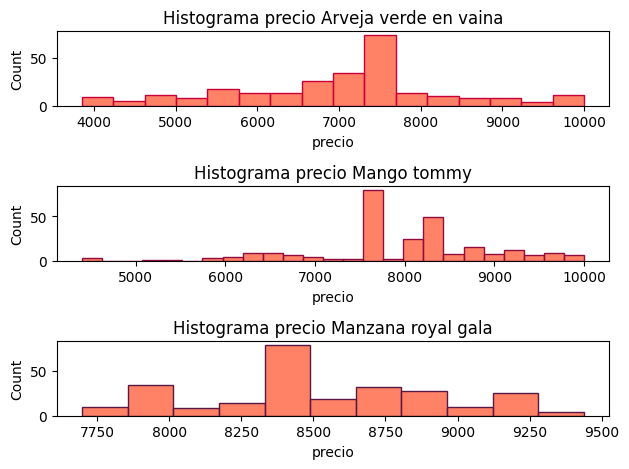

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 1)

# Crear una boxplot antes y después de la eliminación
sns.histplot(data = df[df['producto'] == 'Arveja verde en vaina'], x = 'precio', color = "#FF5733", edgecolor = "#C70039", ax = axes[0])
sns.histplot(data = df[df['producto'] == 'Mango tommy'], x = 'precio', color = "#FF5733", edgecolor = "#900C3F", ax = axes[1])
sns.histplot(data = df[df['producto'] == 'Manzana royal gala'], x = 'precio', color = "#FF5733", edgecolor = "#581845", ax = axes[2])

# Adicionar nombres
axes[0].set_title('Histograma precio Arveja verde en vaina')
axes[1].set_title('Histograma precio Mango tommy')
axes[2].set_title('Histograma precio Manzana royal gala')

plt.tight_layout()

#### <font color='FFC300'> Boxplot </font>

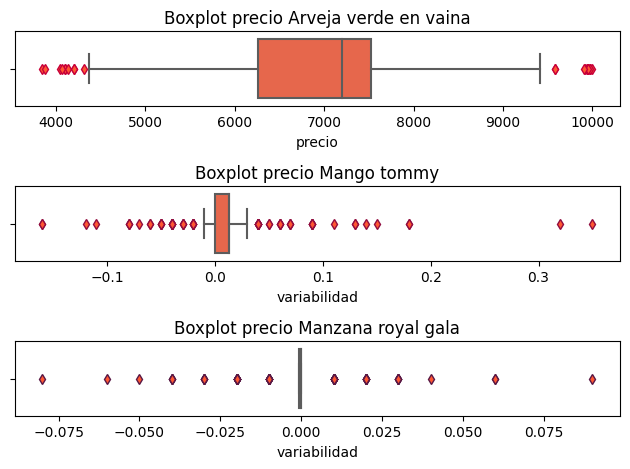

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1)

# Crear una boxplot antes y después de la eliminación
sns.boxplot(data = df[df['producto'] == 'Arveja verde en vaina'], x = 'precio', color = "#FF5733",flierprops={'markerfacecolor': '#FF5733', 'markeredgecolor': '#C70039'}, ax = axes[0])
sns.boxplot(data = df[df['producto'] == 'Mango tommy'], x = 'variabilidad', color = "#FF5733",flierprops={'markerfacecolor': '#FF5733', 'markeredgecolor': '#900C3F'}, ax = axes[1])
sns.boxplot(data = df[df['producto'] == 'Manzana royal gala'], x = 'variabilidad', color = "#FF5733",flierprops={'markerfacecolor': '#FF5733', 'markeredgecolor': '#581845'}, ax = axes[2])

# Adicionar nombres
axes[0].set_title('Boxplot precio Arveja verde en vaina')
axes[1].set_title('Boxplot precio Mango tommy')
axes[2].set_title('Boxplot precio Manzana royal gala')

plt.tight_layout()

#### <font color='FFC300'> Tratamiento

In [ ]:
import pandas as pd
from scipy.stats.mstats import winsorize

arveja_df = df[df['producto'] == 'Arveja verde en vaina'].copy()
manzana_gala_df1 = df[df['producto'] == 'Manzana royal gala'].copy()
manzana_gala_df2 = df[df['producto'] == 'Manzana royal gala'].copy()

arveja_df.loc[:, 'precio'] = winsorize(arveja_df['precio'], limits=(0.15, 0.15))
manzana_gala_df1.loc[:, 'precio'] = winsorize(manzana_gala_df1['precio'], limits=(0.15, 0.15))
manzana_gala_df2.loc[:, 'precio'] = winsorize(manzana_gala_df2['precio'], limits=(0.15, 0.15))

df_winsorized = pd.concat([arveja_df, manzana_gala_df1, manzana_gala_df2])
df_winsorized


,producto,ciudad,precio,variabilidad,fecha,latitud,longitud,categoria,zona,z_score_abs
0,Arveja verde en vaina,armenia,7200.000000,0.100000,2023-08-01,6.163683758,-75.80995528,Verduras y hortalizas,Norte,2.003510
1,Arveja verde en vaina,armenia,7200.000000,0.100000,2023-08-01,4.499501128,-75.72489985,Verduras y hortalizas,Centro,2.003510
2,Arveja verde en vaina,bogotá,7925.000000,0.110000,2023-08-01,4.631192,-74.172471,Verduras y hortalizas,Centro,2.370408
3,Arveja verde en vaina,bucaramanga,6860.000000,0.080000,2023-08-01,7.155833544,-73.11156997,Verduras y hortalizas,Norte,1.831447
4,Arveja verde en vaina,cali,7733.000000,-0.030000,2023-08-01,3.399043723,-76.57649259,Verduras y hortalizas,Centro,2.273243
...,...,...,...,...,...,...,...,...,...,...
9091,Manzana royal gala,medellín,8224.000000,0.010000,2023-08-29,6.257590259,-75.61103107,Frutas,Norte,2.521722
9092,Manzana royal gala,neiva,8947.000000,0.000000,2023-08-29,2.993360046,-75.27236232,Frutas,Centro,2.954408
9093,Manzana royal gala,pereira,8653.116667,-0.000728,2023-08-29,4.803662773,-75.79579093,Frutas,Centro,2.738883
9094,Manzana royal gala,santa,8432.921053,-0.000728,2023-08-29,11.246549,-74.206642,Frutas,Norte,2.627450


## <font color='FFC300'>Normalización o estandarización de variables </font>

6.	Justificación de la necesidad de normalizar o estandarizar variables

(array([ 967., 2615., 1893., 1763.,  722.,  325.,  241.,  290.,  322.,
          89.]),
 array([  339. ,  1305.1,  2271.2,  3237.3,  4203.4,  5169.5,  6135.6,
         7101.7,  8067.8,  9033.9, 10000. ]),
 <BarContainer object of 10 artists>)

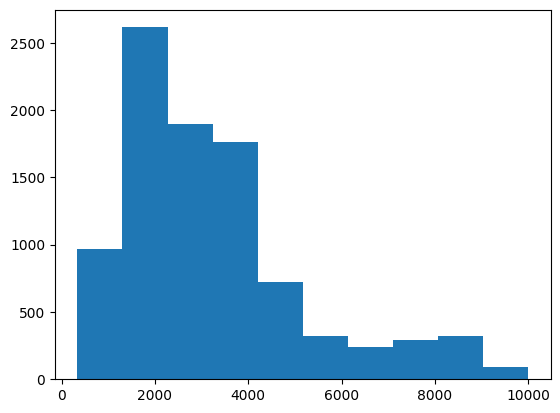

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['precio'])

(array([2.500e+01, 2.170e+02, 3.164e+03, 5.422e+03, 3.060e+02, 6.900e+01,
        1.400e+01, 4.000e+00, 5.000e+00, 1.000e+00]),
 array([-0.46 , -0.308, -0.156, -0.004,  0.148,  0.3  ,  0.452,  0.604,
         0.756,  0.908,  1.06 ]),
 <BarContainer object of 10 artists>)

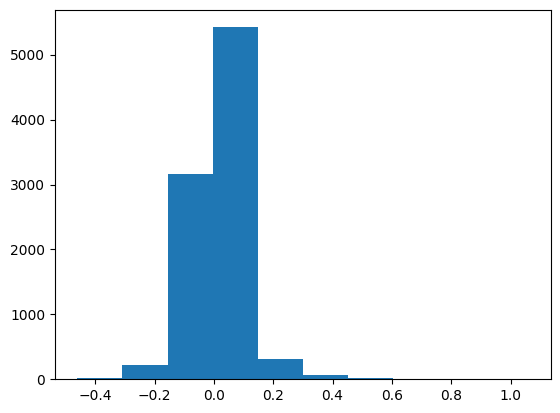

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['variabilidad'])

### <font color='FFC300'> Estandarización </font>

In [ ]:
# Forma de estandarización 3 usando StandardScaler() de sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Crear scaler
# scaler = preprocessing.StandardScaler()

# # Estandarizar las variables
# # df_Standard_Scaler = (X- Media) / sd

# df_Standard_Scaler = scaler.fit_transform(df)
# df_Standard_Scaler


In [ ]:
# Forma de estandarización 1 usando stats.zscore de scipy

import pandas as pd
import scipy
from scipy import stats
df['precio'] = stats.zscore(df['precio'])
df['variabilidad'] = stats.zscore(df['variabilidad'])
df

<ipython-input-46-4e6705052fae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['precio'] = stats.zscore(df['precio'])
<ipython-input-46-4e6705052fae>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['variabilidad'] = stats.zscore(df['variabilidad'])


,producto,ciudad,precio,variabilidad,fecha,latitud,longitud,categoria,zona,z_score_abs
0,Arveja verde en vaina,armenia,2.003510,1.193891,2023-08-01,6.163683758,-75.80995528,Verduras y hortalizas,Norte,2.003510
1,Arveja verde en vaina,armenia,2.003510,1.193891,2023-08-01,4.499501128,-75.72489985,Verduras y hortalizas,Centro,2.003510
2,Arveja verde en vaina,bogotá,2.370408,1.316863,2023-08-01,4.631192,-74.172471,Verduras y hortalizas,Centro,2.370408
3,Arveja verde en vaina,bucaramanga,1.831447,0.947948,2023-08-01,7.155833544,-73.11156997,Verduras y hortalizas,Norte,1.831447
4,Arveja verde en vaina,cali,2.273243,-0.404741,2023-08-01,3.399043723,-76.57649259,Verduras y hortalizas,Centro,2.273243
...,...,...,...,...,...,...,...,...,...,...
9235,Yuca*,medellín,-0.805157,0.702004,2023-08-29,6.257590259,-75.61103107,"Tubérculos, raíces y plátanos",Norte,0.805157
9236,Yuca*,neiva,-0.768222,-0.067102,2023-08-29,2.993360046,-75.27236232,"Tubérculos, raíces y plátanos",Centro,0.768222
9237,Yuca*,pereira,-0.931674,0.087146,2023-08-29,4.803662773,-75.79579093,"Tubérculos, raíces y plátanos",Centro,0.931674
9238,Yuca*,santa,-0.724139,-0.067102,2023-08-29,11.246549,-74.206642,"Tubérculos, raíces y plátanos",Norte,0.724139


## <font color='FFC300'> Preguntas </font>

7.	Mínimo 5 preguntas que quiera resolver a partir del filtrado de columnas o filas


1. ¿Cuál es la variabilidad de precios de los productos en la categoría "verduras y hortalizas" en diferentes ciudades?
2. ¿Cómo ha evolucionado el precio por categoría en el tiempo?
3. ¿Hay diferencias significativas en los precios de productos entre las distintas zonas?
4. ¿Cómo distribuyen los precios de productos por categoría?
5. ¿Qué productos tienen la mayor variabilidad de precios?


## <font color='FFC300'> Gráficos </font>

8.	Mínimo 5 gráficos que sean de interés para entender el problema


### <font color='FFC300'>Barplot de los precios de cada categoría respecto a la zona

In [ ]:
import seaborn as sns
import pandas as pd

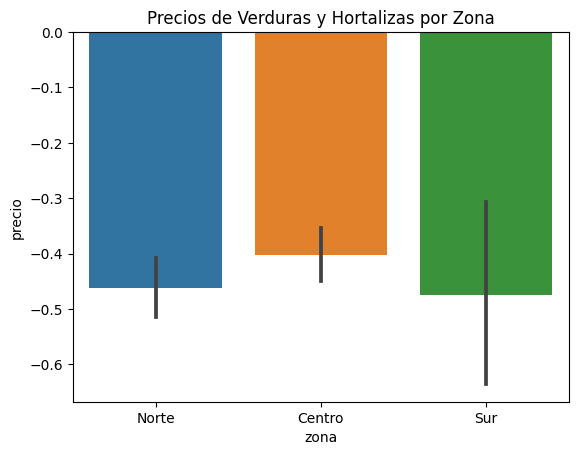

In [ ]:
sns.barplot(data=df[df['categoria'] == 'Verduras y hortalizas'], x='zona', y='precio')
plt.title('Precios de Verduras y Hortalizas por Zona')
plt.show()

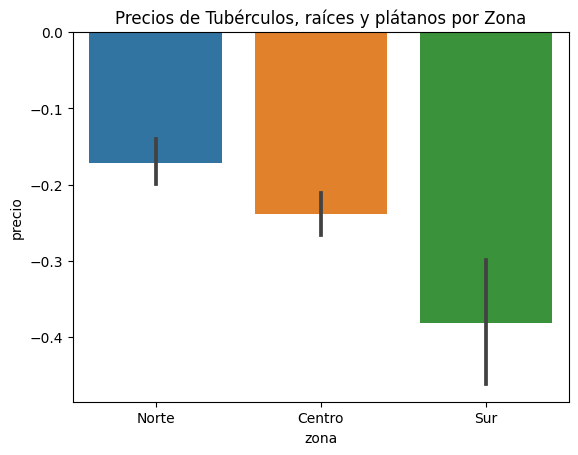

In [ ]:
sns.barplot(data=df[df['categoria'] == 'Tubérculos, raíces y plátanos'], x='zona', y='precio')
plt.title('Precios de Tubérculos, raíces y plátanos por Zona')
plt.show()

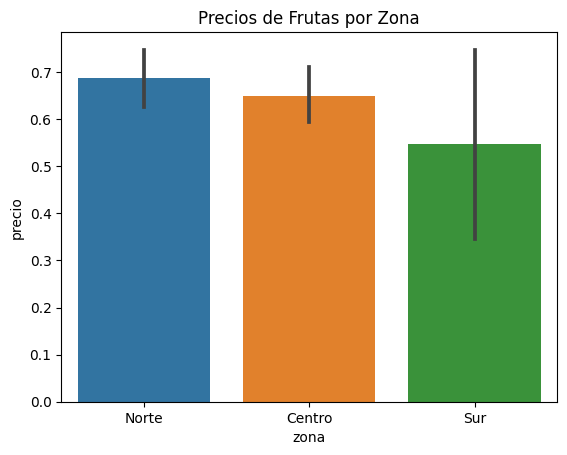

In [ ]:
sns.barplot(data=df[df['categoria'] == 'Frutas'], x='zona', y='precio')
plt.title('Precios de Frutas por Zona')
plt.show()

### <font color='FFC300'> lineplot para comportamiento del precio por categoría a través del tiempo

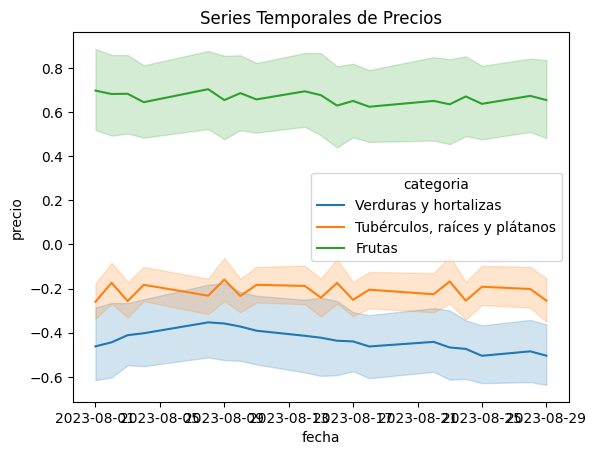

In [ ]:
sns.lineplot(data=df, x='fecha', y='precio', hue='categoria')
plt.title('Series Temporales de Precios')
plt.show()